In [1]:
%run sharedMethods.ipynb

In [2]:

config = Config({'expiration': '31DEC21',
          'strikes': [ 40000, 48000, 60000 ]
         })

In [3]:
display(Markdown(f'## Price changes for **{config.expiration}**'))

## Price changes for **31DEC21**

In [4]:
display(Markdown(f'### Strikes **{config.strikes}**'))

### Strikes **[40000, 48000, 60000]**

In [5]:
merged_df = getMergedDataframe(config)

# Unfortunately that leads to a wrong line chart
#merged_df = merged_df.interpolate(method='linear') # or cubic

merged_df = merged_df.dropna()
merged_df


'option_data/BTC-31DEC21-40000-C.json exist already.'

timestamp   btc_usd  option_40000_usd  option_48000_usd   
0     2021-12-29  46483.36       7042.229040       7042.229040  \
4     2021-12-28  47543.30       7987.274400       7987.274400   
8     2021-12-27  50718.11      11310.138530      11310.138530   
12    2021-12-26  50791.21      10615.362890      10615.362890   
16    2021-12-25  50442.22      10618.087310      10618.087310   
...          ...       ...               ...               ...   
1239  2020-12-28  27037.91       6124.086615       6124.086615   
1245  2020-12-27  26259.60       6302.304000       6302.304000   
1251  2020-12-26  26466.28       6140.176960       6140.176960   
1257  2020-12-25  24705.15       4941.030000       4941.030000   
1263  2020-12-24  23726.28       4674.077160       4674.077160   

      option_60000_usd  
0           232.416800  
4           879.551050  
8          3702.422030  
12         2691.934130  
16         3303.965410  
...                ...  
1239       5002.013350  
1245       5396.347800  
1251       4644.832140  
1257       4162.817775  
1263       3902.973060  

[229 rows x 5 columns]

### Show the Plain prices of BTC and the Options

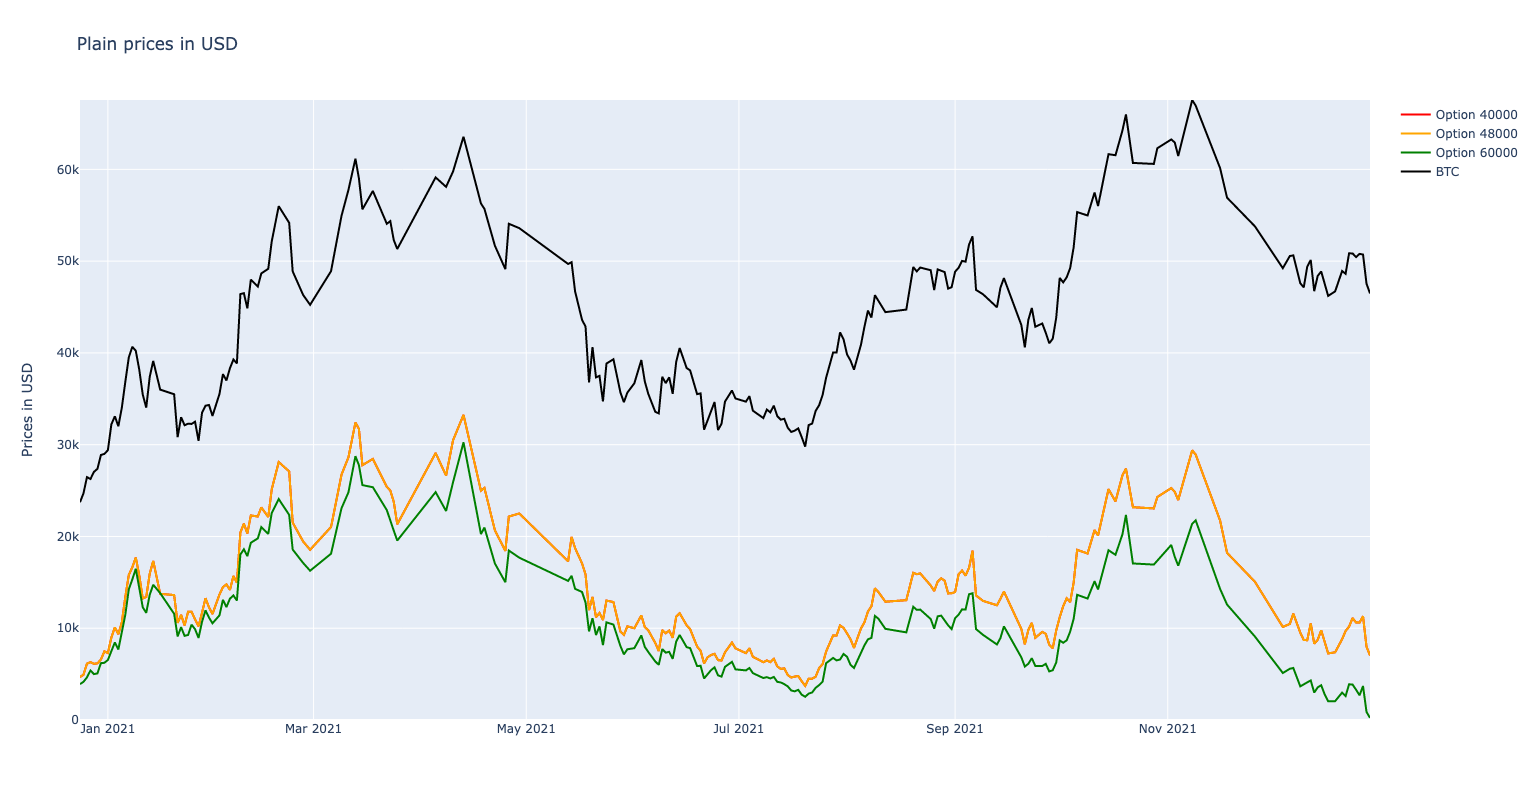

In [6]:

showPlainPriceChart(merged_df, config.strikes)

In [7]:
getTradingViewWidget("Bitstamp:BTCUSD")


### Move the lines up to the same startpoint of BTC to roughly visualize the delta

In [8]:

shiftLinesToTheStartOfBTC(merged_df, config.strikes)
merged_df

timestamp   btc_usd  option_40000_usd  option_48000_usd   
0     2021-12-29  46483.36       7042.229040       7042.229040  \
4     2021-12-28  47543.30       7987.274400       7987.274400   
8     2021-12-27  50718.11      11310.138530      11310.138530   
12    2021-12-26  50791.21      10615.362890      10615.362890   
16    2021-12-25  50442.22      10618.087310      10618.087310   
...          ...       ...               ...               ...   
1239  2020-12-28  27037.91       6124.086615       6124.086615   
1245  2020-12-27  26259.60       6302.304000       6302.304000   
1251  2020-12-26  26466.28       6140.176960       6140.176960   
1257  2020-12-25  24705.15       4941.030000       4941.030000   
1263  2020-12-24  23726.28       4674.077160       4674.077160   

      option_60000_usd  option_40000_offsetted_usd   
0           232.416800                26094.431880  \
4           879.551050                27039.477240   
8          3702.422030                30362.341370   
12         2691.934130                29667.565730   
16         3303.965410                29670.290150   
...                ...                         ...   
1239       5002.013350                25176.289455   
1245       5396.347800                25354.506840   
1251       4644.832140                25192.379800   
1257       4162.817775                23993.232840   
1263       3902.973060                23726.280000   

      option_48000_offsetted_usd  option_60000_offsetted_usd  
0                   26094.431880                20055.723740  
4                   27039.477240                20702.857990  
8                   30362.341370                23525.728970  
12                  29667.565730                22515.241070  
16                  29670.290150                23127.272350  
...                          ...                         ...  
1239                25176.289455                24825.320290  
1245                25354.506840                25219.654740  
1251                25192.379800                24468.139080  
1257                23993.232840                23986.124715  
1263                23726.280000                23726.280000  

[229 rows x 8 columns]

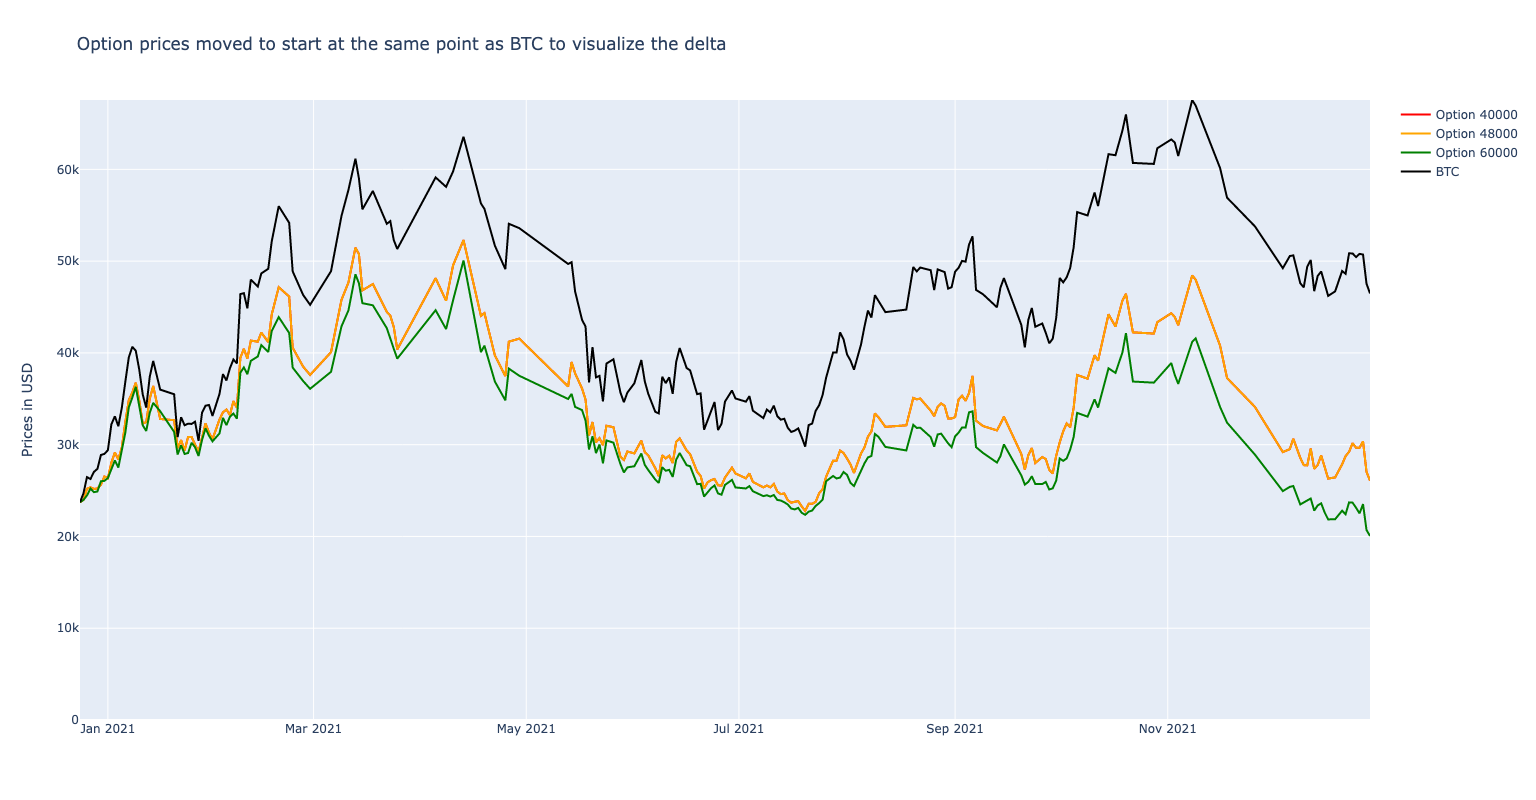

In [9]:
showOffsettedPriceChart(merged_df, config.strikes)

In [10]:
dfPricesChangedUSD = getPriceChanges(merged_df, config.strikes)
dfPricesChangedUSD
        

timestamp   btc_usd  option_40000_changed_usd   
0     2021-12-29  46483.36               -945.045360  \
4     2021-12-28  47543.30              -3322.864130   
8     2021-12-27  50718.11                694.775640   
12    2021-12-26  50791.21                 -2.724420   
16    2021-12-25  50442.22               -490.776070   
...          ...       ...                       ...   
1239  2020-12-28  27037.91               -178.217385   
1245  2020-12-27  26259.60                162.127040   
1251  2020-12-26  26466.28               1199.146960   
1257  2020-12-25  24705.15                266.952840   
1263  2020-12-24  23726.28                       NaN   

      option_40000_changed_percent  option_48000_changed_usd   
0                       -13.419691               -945.045360  \
4                       -41.601978              -3322.864130   
8                         6.142945                694.775640   
12                       -0.025665                 -2.724420   
16                       -4.622076               -490.776070   
...                            ...                       ...   
1239                     -2.910106               -178.217385   
1245                      2.572504                162.127040   
1251                     19.529518               1199.146960   
1257                      5.402777                266.952840   
1263                           NaN                       NaN   

      option_48000_changed_percent  option_60000_changed_usd   
0                       -13.419691               -647.134250  \
4                       -41.601978              -2822.870980   
8                         6.142945               1010.487900   
12                       -0.025665               -612.031280   
16                       -4.622076               -559.987070   
...                            ...                       ...   
1239                     -2.910106               -394.334450   
1245                      2.572504                751.515660   
1251                     19.529518                482.014365   
1257                      5.402777                259.844715   
1263                           NaN                       NaN   

      option_60000_changed_percent  btc_usd_changed_usd   
0                      -278.436950             -1059.94  \
4                      -320.944530             -3174.81   
8                        27.292618               -73.10   
12                      -22.735745               348.99   
16                      -16.948939              -399.26   
...                            ...                  ...   
1239                     -7.883515               778.31   
1245                     13.926376              -206.68   
1251                     10.377433              1761.13   
1257                      6.242039               978.87   
1263                           NaN                  NaN   

      btc_usd_changed_percent  
0                   -2.280257  
4                   -6.677723  
8                   -0.144130  
12                   0.687107  
16                  -0.791519  
...                       ...  
1239                 2.878588  
1245                -0.787065  
1251                 6.654241  
1257                 3.962210  
1263                      NaN  

[229 rows x 10 columns]

### Absolute changes in USD compared to previous day. The Delta.

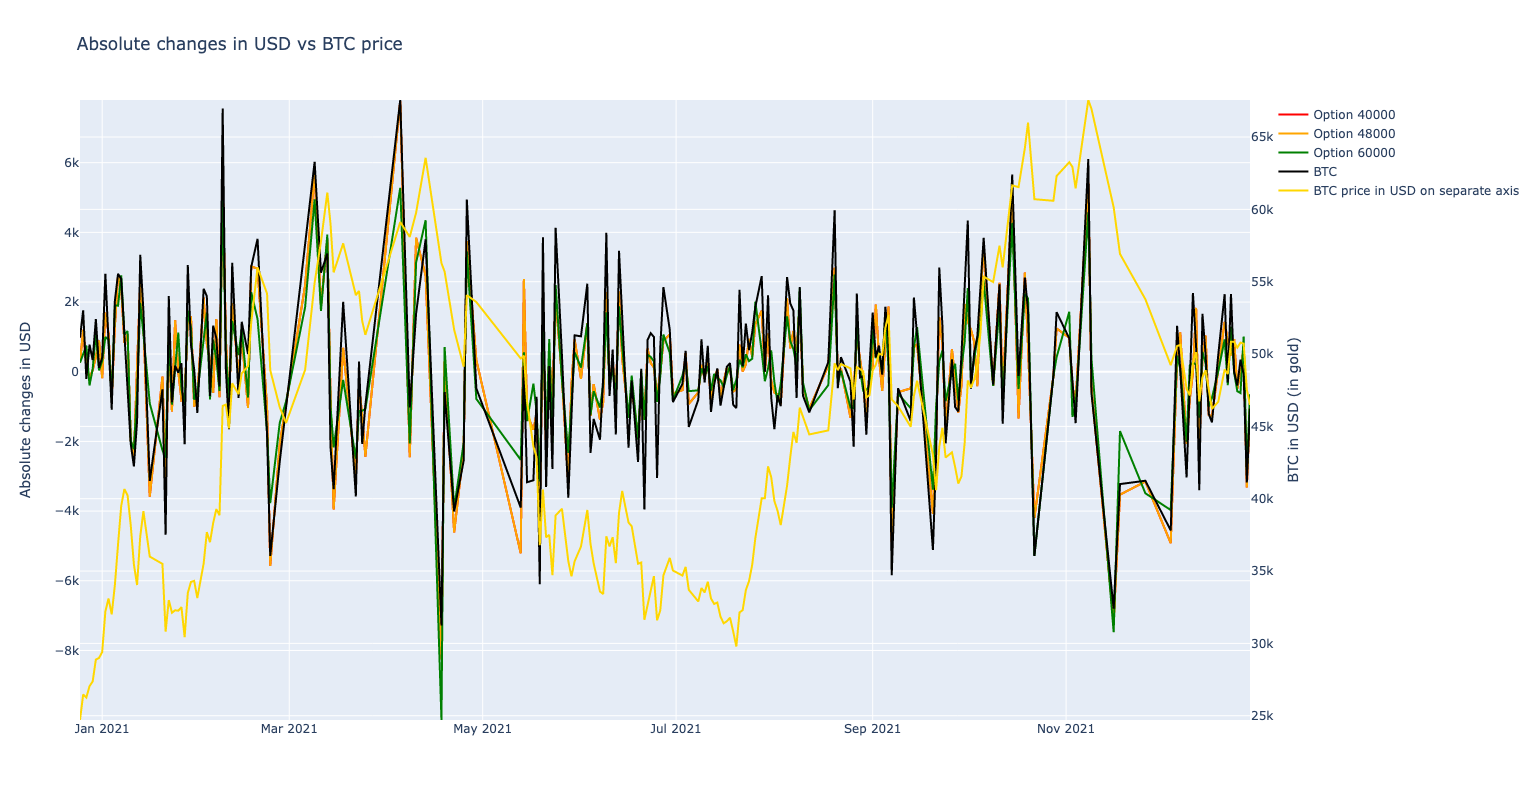

In [11]:
dfPricesChangedUSD = dfPricesChangedUSD.dropna()

plotOptionPricesChangedUSD(dfPricesChangedUSD, config.strikes)


### Percent changes compared to previous data point relative to the BTC price

#### The out of the money options fluctuate more than the options that are more in the money.

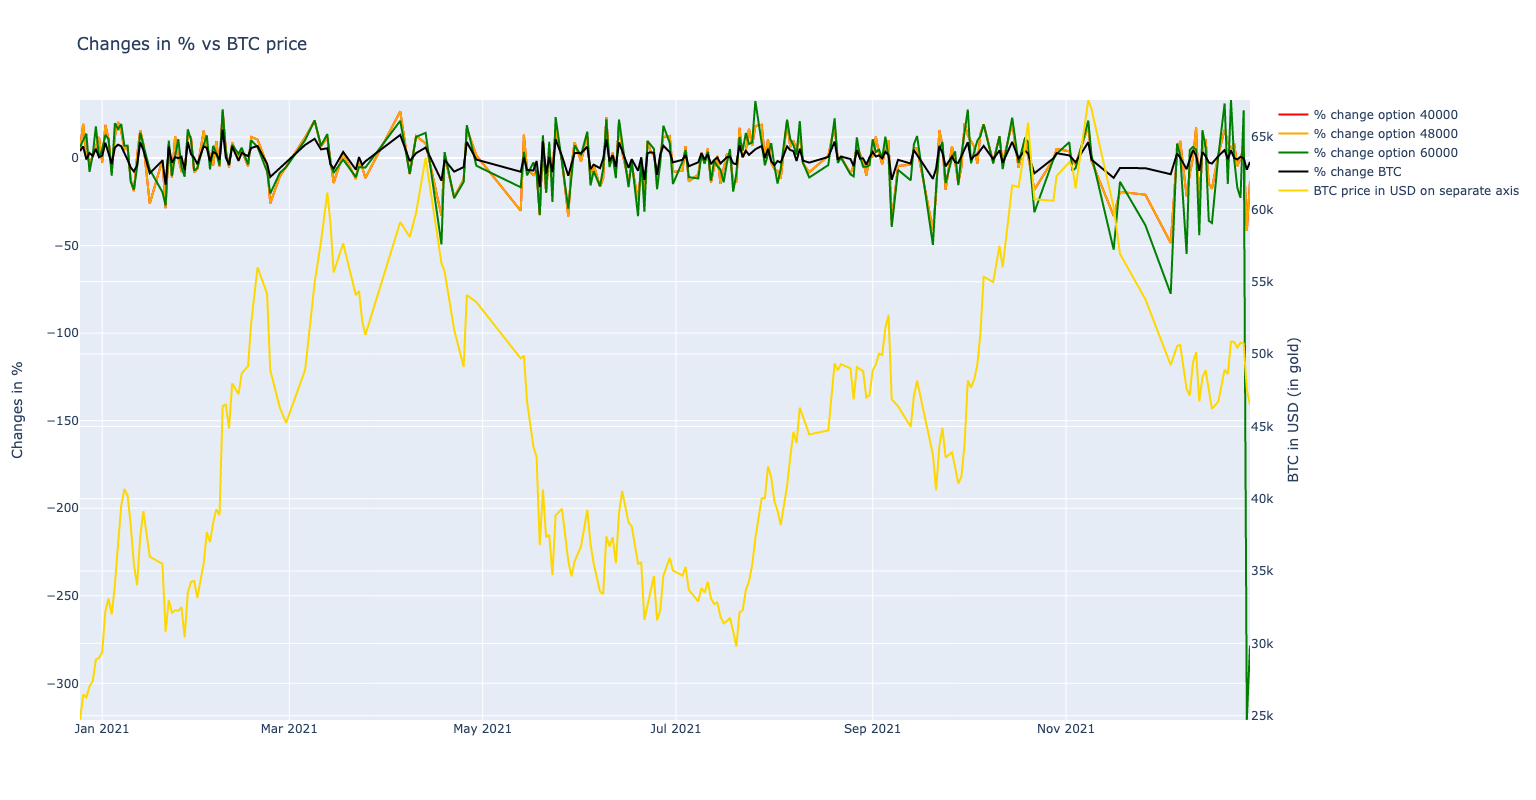

In [12]:
display(Markdown('#### The out of the money options fluctuate more than the options that are more in the money.'))
plotOptionPricesChangedPercent(dfPricesChangedUSD, config.strikes)

## Price increase in %

In [13]:
df_percent_all = calcGains(merged_df, config.strikes)

#with pd.option_context('display.max_rows', None):
#    display(df_percent_all)
df_percent_all

timestamp   btc_usd  btc_percent_all  option_40000_usd   
0     2021-12-29  46483.36        95.915078       7042.229040  \
4     2021-12-28  47543.30       100.382445       7987.274400   
8     2021-12-27  50718.11       113.763430      11310.138530   
12    2021-12-26  50791.21       114.071527      10615.362890   
16    2021-12-25  50442.22       112.600627      10618.087310   
...          ...       ...              ...               ...   
1239  2020-12-28  27037.91        13.957645       6124.086615   
1245  2020-12-27  26259.60        10.677274       6302.304000   
1251  2020-12-26  26466.28        11.548376       6140.176960   
1257  2020-12-25  24705.15         4.125678       4941.030000   
1263  2020-12-24  23726.28         0.000000       4674.077160   

      option_40000_percent_all  option_48000_usd  option_48000_percent_all   
0                    50.665657       7042.229040                 50.665657  \
4                    70.884522       7987.274400                 70.884522   
8                   141.975863      11310.138530                141.975863   
12                  127.111417      10615.362890                127.111417   
16                  127.169705      10618.087310                127.169705   
...                        ...               ...                       ...   
1239                 31.022369       6124.086615                 31.022369   
1245                 34.835258       6302.304000                 34.835258   
1251                 31.366615       6140.176960                 31.366615   
1257                  5.711349       4941.030000                  5.711349   
1263                  0.000000       4674.077160                  0.000000   

      option_60000_usd  option_60000_percent_all  
0           232.416800                -94.045134  
4           879.551050                -77.464588  
8          3702.422030                 -5.138417  
12         2691.934130                -31.028626  
16         3303.965410                -15.347471  
...                ...                       ...  
1239       5002.013350                 28.159054  
1245       5396.347800                 38.262492  
1251       4644.832140                 19.007538  
1257       4162.817775                  6.657610  
1263       3902.973060                  0.000000  

[229 rows x 9 columns]

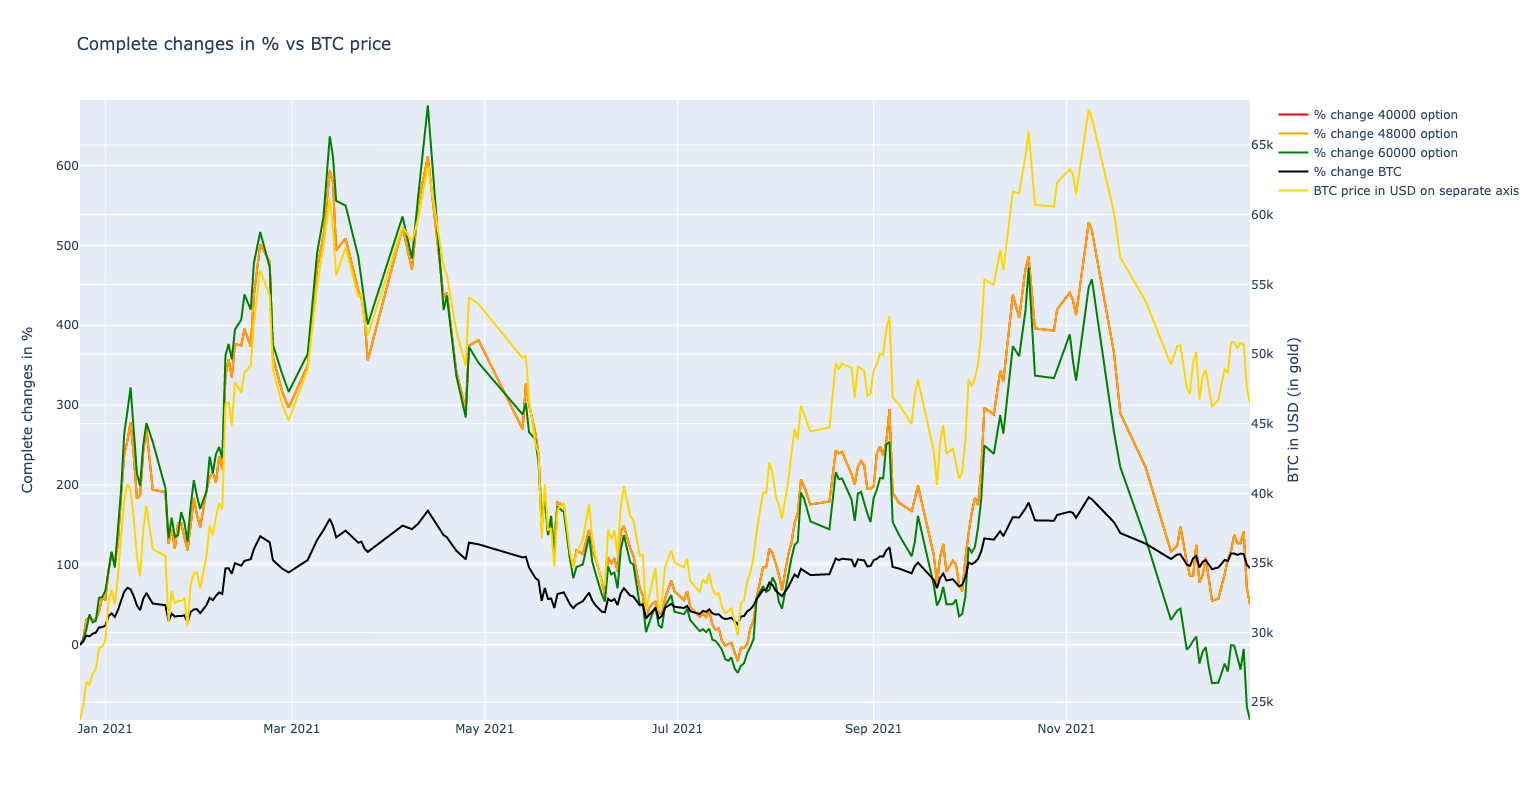

In [14]:
plotOptionPricesChangedPercentAll(df_percent_all, config.strikes)